In [1]:
!pip install tensorflow==1.13.1
!pip install tensorflow-gpu==1.13.1
!git clone https://github.com/matterport/Mask_RCNN.git
!pip install keras==2.1.0

     |████████████████████████████████| 92.5MB 76kB/s 
     |████████████████████████████████| 3.2MB 45.3MB/s 
     |████████████████████████████████| 368kB 57.7MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 345.2MB 24kB/s 
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.82 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (568/568), done.
     |████████████████████████████████| 307kB 9.0MB/s 
ERROR: textgenrnn 1.4.1 has requiremen

In [25]:
!apt install tesseract-ocr tesseract-ocr-kor
!apt install tesseract-ocr tesseract-ocr-script-hang tesseract-ocr-script-hang-vert
!pip3 install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-kor tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 5,845 kB of archives.
After this operation, 17.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 5,845 kB in 0s (30.2 MB/s)
Selecting previously unselecte

In [58]:
%cd /content/Mask_RCNN

/content/Mask_RCNN


In [50]:
!python3 setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/__init__.py to __init_

In [0]:
!python3 samples/balloon/custom_balloon.py train --dataset=dataset --weights=mask_rcnn_balloon_0020.h5

In [0]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io
import cv2
# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import receipt_classification
from samples.balloon import custom_balloon as balloon

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs/balloon20200412T0719")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "/content/Mask_RCNN/logs/balloon20200412T0949/mask_rcnn_balloon_0019.h5"  # TODO: update this path

In [0]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "dataset")

In [53]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [54]:
binary_model = receipt_classification.buildModel()
binary_model.load_weights('/content/Mask_RCNN/binary_classification4.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 20, 11, 512)       14713536  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 11, 512)       2359808   
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 17,073,857
Trainable params: 17,073,857
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [0]:
# Load validation dataset
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

/content/Mask_RCNN/dataset/val
Images: 54
Classes: ['BG', 'title']


Processing 1 images
image                    shape: (512, 368, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
입소자 간호 기 목 지


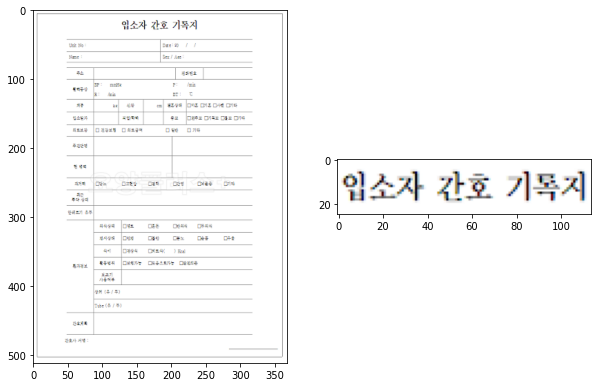

In [37]:
img_path = '/content/Mask_RCNN/test/test_surgery4.jpg'

img = receipt_classification.preprocess_image(img_path)

pred = binary_model.predict(img)

if pred == 1:
  plt.figure(figsize=(10,10))
  plt.imshow(cv2.imread(img_path))
  print('의료 영수증')
else:
  image = skimage.io.imread(img_path)
  # Run detection
  results = model.detect([image], verbose=1)
  r = results[0]
  for i in range(len(r['scores'])):
    if r['scores'][i] > 0.98:
      y1,x1,y2,x2 = r['rois'][i]
      area = (x2-x1) * (y2-y1)
      if area > max_area:
        max_area = area
        index = i
  y1,x1,y2,x2 = r['rois'][index]
  img2 = image[y1:y2, x1:x2]
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.imshow(image)
  plt.subplot(1,2,2)
  plt.imshow(img2)
  gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  img_thres = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9, 3)
  print(pytesseract.image_to_string(img_thres, lang='Hangul'))
  #print('-'*60)
  #print('추출 결과 : ', pytesseract.image_to_string(img2, lang='Hangul'))
  #print('-'*60)

In [27]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract


# 영어 인식
#print(pytesseract.image_to_string(Image.open('english.png')))

# 한글 
print(pytesseract.image_to_string(img2, lang='Hangul'))

구 서

0

보


In [0]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights('/content/Mask_RCNN/mask_rcnn_balloon_0029.h5', by_name=True)

In [64]:
folder_path = 'test'
filelist = glob.glob(folder_path + '/*')

for i, img_path in enumerate(filelist):
  print(img_path)
  img = receipt_classification.preprocess_image(img_path)

  pred = binary_model.predict(img)

  if pred == 1:
    fig1 = plt.figure(figsize=(10,10))
    print('의료 영수증')
    plt.subplot(1,1,1)
    plt.imshow(cv2.imread(img_path))
    plt.show()
    print('\n\n')
    
  
  else:
    image = skimage.io.imread(img_path)
    # Run detection
    results = model.detect([image], verbose=1)
    r = results[0]
    max_area = 0
    index = 0
    for i in range(len(r['scores'])):
      if r['scores'][i] > 0.98:
        y1,x1,y2,x2 = r['rois'][i]
        area = (x2-x1) * (y2-y1)
        if area > max_area:
          max_area = area
          index = i
    y1,x1,y2,x2 = r['rois'][index]
    img2 = image[y1:y2, x1:x2]
    fig2 = plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img_thres = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9, 3)
    ret, thres = cv2.threshold(gray, 127,255,cv2.THRESH_BINARY)
    print('-'*60)
    print('추출결과:' , pytesseract.image_to_string(img_thres, lang='Hangul'))
    print('-'*60)
    plt.title('Title')
    plt.imshow(img2)
    plt.show()
    

Output hidden; open in https://colab.research.google.com to view.